## Fraud Detection (Supervised approach)

**Contents:**
1. Loading the data
2. Data Viszulation
3. Resampling the data using SMOTE
4. Fraud Detection (classification tasks)
5. Evaluation metrics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Explore the features available in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


The ratio of fraudulent transactions is very low (class imbalance present)

## Data Vizualization

In [ ]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [ ]:
# A function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [ ]:
X, y = prep_data(df)

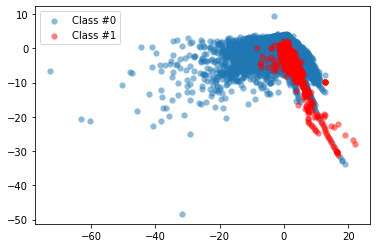

In [ ]:
plot_data(X, y)

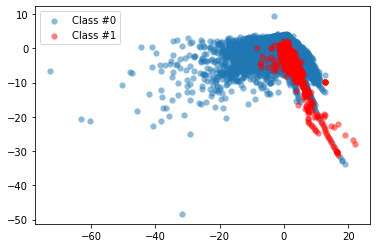

In [ ]:
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

## SMOTE (Resampling for imbalanced datat)

In [ ]:
# Resampling using SMOTE analysis
method = SMOTE()

In [ ]:
X_resampled, y_resampled = method.fit_resample(X, y)

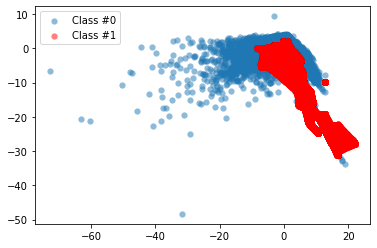

In [ ]:
plot_data(X_resampled, y_resampled)

### Compare SMOTE to original data

In [ ]:
# Original Data
pd.value_counts(pd.Series(y))

0    284315
1       492
dtype: int64

In [ ]:
# Resampled Data
pd.value_counts(pd.Series(y_resampled))

1    284315
0    284315
dtype: int64

In [ ]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

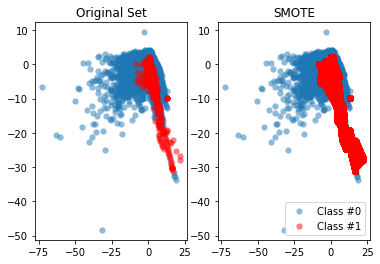

In [ ]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

It is clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class.

## Fraud Detection using labeled data (Classification task)

We perform the classification tasks on the resampled data.

In [ ]:
predictions = []

### 1. Logistic Regression 

In [ ]:
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

In [ ]:
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [ ]:
# Split the data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

In [ ]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.19      0.86      0.31       147

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.66     85443
weighted avg       1.00      0.99      1.00     85443

Confusion matrix:
 [[84763   533]
 [   20   127]]


In [ ]:
predictions.append([predicted, y_test])

### 2. Decision Trees

In [ ]:
decision_tree_clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
decision_tree_clf = decision_tree_clf.fit(X_train, y_train)
# Predict the response for test dataset
predicted = decision_tree_clf.predict(X_test)

In [ ]:
predictions.append([predicted, y_test])

In [ ]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=predictions[1][1], y_pred=predictions[1][1])
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85296     0]
 [    0   147]]


### 3. Random Forests

In [ ]:
model = RandomForestClassifier()
# Train Random Forests Classifer
model.fit(X_train, y_train)
# Predict the response for test dataset
predicted = model.predict(X_test)

In [ ]:
predictions.append([predicted, y_test])

In [ ]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=predictions[2][1], y_pred=predictions[2][0])
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   34   113]]


## Evaluation metircs

In [ ]:
# Function to calculate the accuracy
def accuracy_results(preds, y_true):
  tp = 0
  tn = 0
  fp = 0 
  fn = 0

  for i in range(len(preds)):
    if preds[i] == 1 and y_true[i] == 1:
      tp += 1
    elif preds[i] == 1 and y_true[i] == 0:
      fp += 1
    elif preds[i] == 0 and y_true[i] == 0:
      tn += 1
    elif preds[i] == 0 and y_true[i] == 1:
      fn += 1
  acc = (tp + tn) / (tp + fp + fn + tn) 
  return acc

# Function to calculate the precision, recall and F1-score
def precision_recall_f1_score(preds, y_true):
  tp = 0
  tn = 0
  fn = 0
  fp = 0
  p = 0
  n = 0
  precision = 0
  recall = 0
  f1_score = 0
  tpr = 0
  fpr = 0
  for i in range(len(y_true)):
    if y_true[i] == 0:
      n += 1
    else:
      p += 1
  for i in range(len(preds)):
    if preds[i] == 1 and y_true[i] == 1:
      tp += 1
    elif preds[i] == 1 and y_true[i] == 0:
      fp += 1
    elif preds[i] == 0 and y_true[i] == 0:
      tn += 1
    elif preds[i] == 0 and y_true[i] == 1:
      fn += 1

  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  if precision != 0 and recall != 0:
    f1_score = (2 * precision * recall) / (precision + recall)
  else:
    f1_score = 0
  tpr = tp / p
  fpr = fp / n
  return (precision, recall, f1_score, tpr, fpr)  

In [ ]:
models = ["Logistic Regression", "Decision Tree Classifier", "Random Forests Classifier"]
f1_array = []
for i in range(len(predictions)):
  pred = predictions[i][0]
  test = predictions[i][1]
  acc = accuracy_results(pred, test)
  pre, rec, f1, tpr, fpr = precision_recall_f1_score(pred, test)
  f1_array.append(f1)
  if i == 3:
    print("-----------------------------------------------------------------------------------------------")
    print(f"\nModel: {models[i]}\n")
    print(f"Accuracy: {acc}")
    print("-----------------------------------------------------------------------------------------------")
    continue
  
  precision, recall, f1_score, tpr, fpr = precision_recall_f1_score(pred, test)
  print("-----------------------------------------------------------------------------------------------")
  print(f"\nModel: {models[i]}\n")
  print(f"Accuracy: {acc}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1_score}")
  print(f"TPR: {tpr} \nFPR:{fpr}")
  print("-----------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------

Model: Logistic Regression

Accuracy: 0.9935278489753403
Precision: 0.19242424242424241
Recall: 0.8639455782312925
F1-score: 0.3147459727385377
TPR: 0.8639455782312925 
FPR:0.006248827612080285
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

Model: Decision Tree Classifier

Accuracy: 0.9992977774656788
Precision: 0.8222222222222222
Recall: 0.7551020408163265
F1-score: 0.7872340425531914
TPR: 0.7551020408163265 
FPR:0.0002813731007315701
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

Model: Random Forests Classifier

Accuracy: 0.9995318516437859
Precision: 0.9495798319327731
Recall: 0.7687074829931972
F1-s

-----------------------------------------------------------------------------------------------

Model: Logistic Regression

ROC_AUC score: 0.9288483753096061


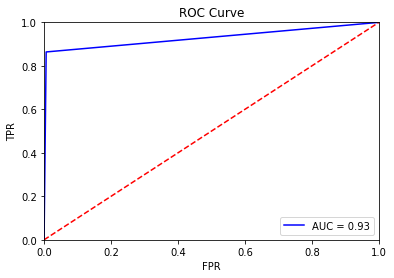

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

Model: Decision Tree Classifier

ROC_AUC score: 0.8774103338577974


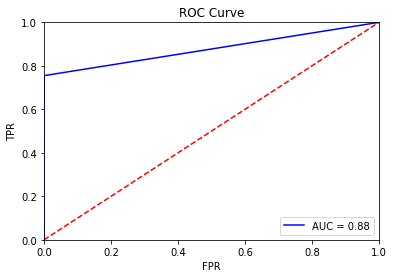

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

Model: Random Forests Classifier

ROC_AUC score: 0.8843185698590073


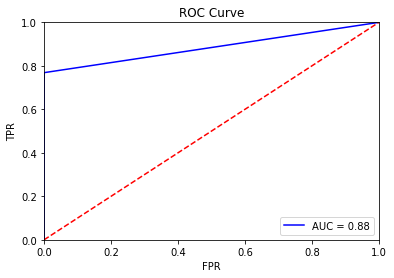

-----------------------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
for i in range(len(predictions)):
  pred = predictions[i][0]
  test = predictions[i][1]
  fpr, tpr, thresholds = roc_curve(test, pred)
  roc_auc = roc_auc_score(test, pred)
  print("-----------------------------------------------------------------------------------------------")
  print(f"\nModel: {models[i]}\n")
  print(f"ROC_AUC score: {roc_auc}")  
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.title("ROC Curve")
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.show();
  print("-----------------------------------------------------------------------------------------------")


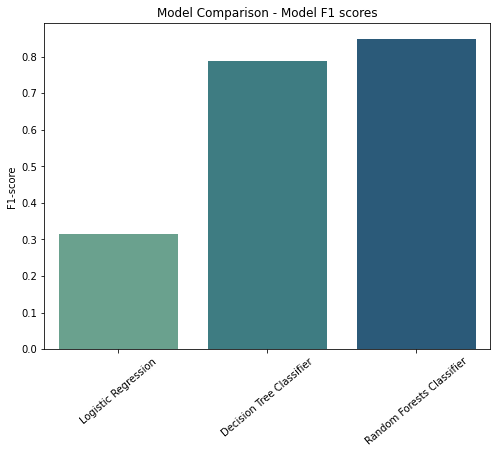

In [ ]:
# Performance of models based on F1-scores
performance = {}
for i in range(len(models)):
  performance[models[i]] = f1_array[i]
keys = performance.keys()
values = performance.values()


fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=list(keys), y=list(values), palette="crest");
plt.ylabel("F1-score")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model F1 scores");

Random Forests is the best performing model followed by Decision Tree Classifier and Logistic Regression.